<a href="https://colab.research.google.com/github/EasonChen78/machine_learning/blob/main/20230320_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
# from sklearn.datasets import load_diabetes
from urllib.request import urlretrieve
import pandas as pd
url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
urlretrieve(url, "diabetes.txt")
df = pd.read_csv("diabetes.txt", encoding="utf-8", sep="\t")
df.to_csv("diabetes.csv", index=False)
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [92]:
import numpy as np
from sklearn.model_selection import train_test_split
x = df.drop(["Y"], axis=1)
y = df["Y"]
np_x = np.array(x)
np_y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(np_x, np_y, test_size=0.1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(397, 10)
(45, 10)
(397,)
(45,)


In [93]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'S5 <= 4.64\nsquared_error = 6017.472\nsamples = 397\nvalue = 151.632'),
 Text(0.25, 0.625, 'BMI <= 26.95\nsquared_error = 3484.415\nsamples = 208\nvalue = 112.178'),
 Text(0.125, 0.375, 'S5 <= 4.167\nsquared_error = 2262.525\nsamples = 161\nvalue = 97.168'),
 Text(0.0625, 0.125, 'squared_error = 1542.615\nsamples = 59\nvalue = 80.831'),
 Text(0.1875, 0.125, 'squared_error = 2435.256\nsamples = 102\nvalue = 106.618'),
 Text(0.375, 0.375, 'AGE <= 26.5\nsquared_error = 4254.454\nsamples = 47\nvalue = 163.596'),
 Text(0.3125, 0.125, 'squared_error = 784.0\nsamples = 2\nvalue = 274.0'),
 Text(0.4375, 0.125, 'squared_error = 3842.881\nsamples = 45\nvalue = 158.689'),
 Text(0.75, 0.625, 'BMI <= 31.55\nsquared_error = 5206.685\nsamples = 189\nvalue = 195.053'),
 Text(0.625, 0.375, 'BMI <= 24.35\nsquared_error = 4450.316\nsamples = 147\nvalue = 177.456'),
 Text(0.5625, 0.125, 'squared_error = 3124.256\nsamples = 35\nvalue = 137.829'),
 Text(0.6875, 0.125, 'squared_error = 422

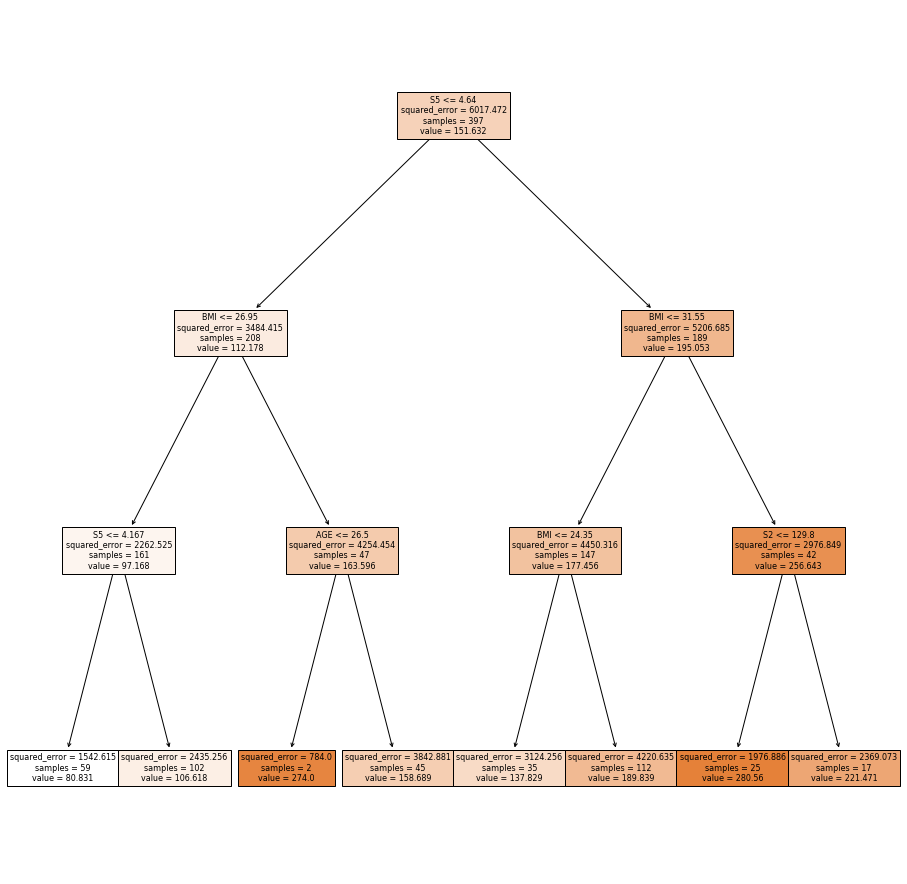

In [94]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plot_tree(reg, feature_names=x.columns, filled=True)

In [95]:
pre = reg.predict(x_test)
pre

array([189.83928571, 158.68888889, 189.83928571, 106.61764706,
       189.83928571, 189.83928571, 106.61764706, 280.56      ,
       137.82857143,  80.83050847, 189.83928571, 106.61764706,
       189.83928571, 106.61764706,  80.83050847, 106.61764706,
        80.83050847, 106.61764706, 158.68888889, 137.82857143,
       137.82857143, 189.83928571, 189.83928571, 189.83928571,
       137.82857143,  80.83050847, 158.68888889, 106.61764706,
       106.61764706,  80.83050847,  80.83050847, 158.68888889,
       280.56      , 106.61764706, 189.83928571, 189.83928571,
       280.56      , 189.83928571, 189.83928571,  80.83050847,
       189.83928571, 280.56      , 158.68888889, 106.61764706,
       280.56      ])

In [96]:
x.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


In [97]:
from sklearn.metrics import r2_score
r2_score(y_test, pre)

0.45238688785061476